<a href="https://colab.research.google.com/github/joseogg/weibull-distribution/blob/main/Weibull.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in power


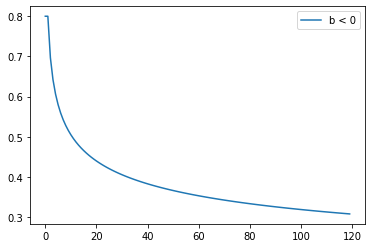

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in reciprocal
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply


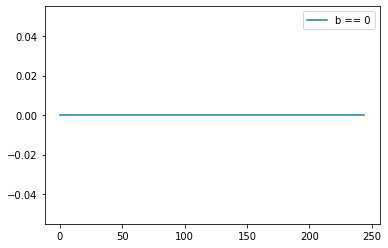

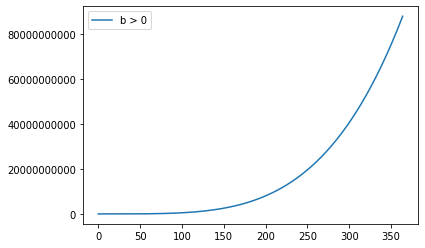

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in power
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in reciprocal
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply


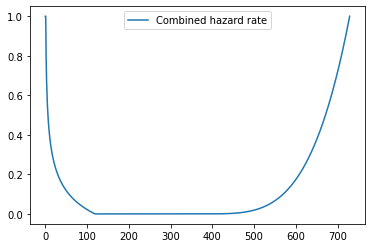

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

left_beta = 0.8
right_beta = 5          

# life span of two years = 120 + 245 + 365

early_life_days = 120
useful_life_days = 245
wearout_life_days = 365

max_early_life_failure_rate = 0.2
max_useful_life_failure_rate = 0.01
max_wearout_life_failure_rate = 0.4

x_early_life = np.arange(early_life_days, dtype=float)
x_useful_life = np.arange(useful_life_days, dtype=float)
x_wearout_life = np.arange(wearout_life_days, dtype=float)

# formula extracted from https://www.itl.nist.gov/div898/handbook/eda/section3/eda3668.htm
# Heckert, N. A., & Filliben, J. J. (2003). NIST/SEMATECH e-Handbook of Statistical Methods; Chapter 1: Exploratory Data Analysis.

def weibull_hazard(x, b): 

    vector = b*(x**(b-1))
    vector[vector == float('inf')] = b
    vector[np.isnan(vector)] = 0
    return vector

def scale_min_max(vector):
    minimum = min(vector)
    maximum = max(vector)
    if (maximum - minimum) == 0:
        return vector        
    vector = (vector - minimum)/(maximum - minimum)
    return vector

                    
plt.plot(weibull_hazard(x_early_life, left_beta), label='b < 0')
plt.legend()
plt.show()

plt.plot(weibull_hazard(x_useful_life, 0), label='b == 0')
plt.legend()
plt.show()

plt.plot(weibull_hazard(x_wearout_life, right_beta), label='b > 0')
plt.ticklabel_format(style='plain')    
plt.legend()
plt.show()

bathtub = np.concatenate((scale_min_max(weibull_hazard(x_early_life, left_beta)), 
                         scale_min_max(weibull_hazard(x_useful_life, 0)),
                         scale_min_max(weibull_hazard(x_wearout_life, right_beta))))

plt.plot(bathtub, label='Combined hazard rate')
plt.legend()
plt.show()



In [2]:
from random import random

def check_over_for_failure(day,
                           bathtub, 
                           max_early_life_failure_rate,
                           max_useful_life_failure_rate,
                           max_wearout_life_failure_rate,
                           early_life_days,
                           useful_life_days,
                           wearout_life_days):

    if day < early_life_days:
        if random() < (max_early_life_failure_rate * bathtub[day]):
            return 1 # early life failure
    elif day < useful_life_days:
        if random() < max_useful_life_failure_rate:
            return 1 # useful life failure
    else: 
        if day >= bathtub.size: # day >= max_days
            day = bathtub.size - 1
        if random() < (max_wearout_life_failure_rate * bathtub[day]):
            return 1 # wearout life failure
    return 0 # does not fail

pod_failures = np.array([])

failures_over_two_years = []

for day in range(730):
    result = check_over_for_failure(day,
                                    bathtub,
                                    max_early_life_failure_rate,
                                    max_useful_life_failure_rate,
                                    max_wearout_life_failure_rate,
                                    early_life_days,
                                    useful_life_days,
                                    wearout_life_days)
    failures_over_two_years.append(result)
    
print(np.array(failures_over_two_years))



[1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

# Generate synthetic data on failures for building models

In [3]:
num_pods = 8 
pod_size = 10 
num_days = early_life_days + useful_life_days + wearout_life_days
failure_data = np.zeros((num_pods, pod_size, num_days))

# Generates synthetic data about servers' failures for a given number of PODs
for pod in range(num_pods):
  # Generate randomly life progresses of servers between 0 and num_days
  life_progresses = (np.random.random(pod_size) * num_days).astype(int)
  # print(life_progresses)
  # Generates failures for each server based on their life progress
  for server in range(pod_size):
      failures_for_two_years = []
      # Verify whether the server fails for a given day based on its life progress
      for day in range(life_progresses[server], life_progresses[server] + num_days):
        server_failure = check_over_for_failure(day,
                                                bathtub,
                                                max_early_life_failure_rate,
                                                max_useful_life_failure_rate,
                                                max_wearout_life_failure_rate,
                                                early_life_days,
                                                useful_life_days,
                                                wearout_life_days)
        failures_for_two_years.append(server_failure)
      failure_data[pod][server] = np.array(failures_for_two_years)

      

failure_data

array([[[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 1., 1.]],

       [[0., 0., 0., ..., 0., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 1., 1., 1.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 1., 0., 0.]],

       [[0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 0., 1.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 1., 1., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 1., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

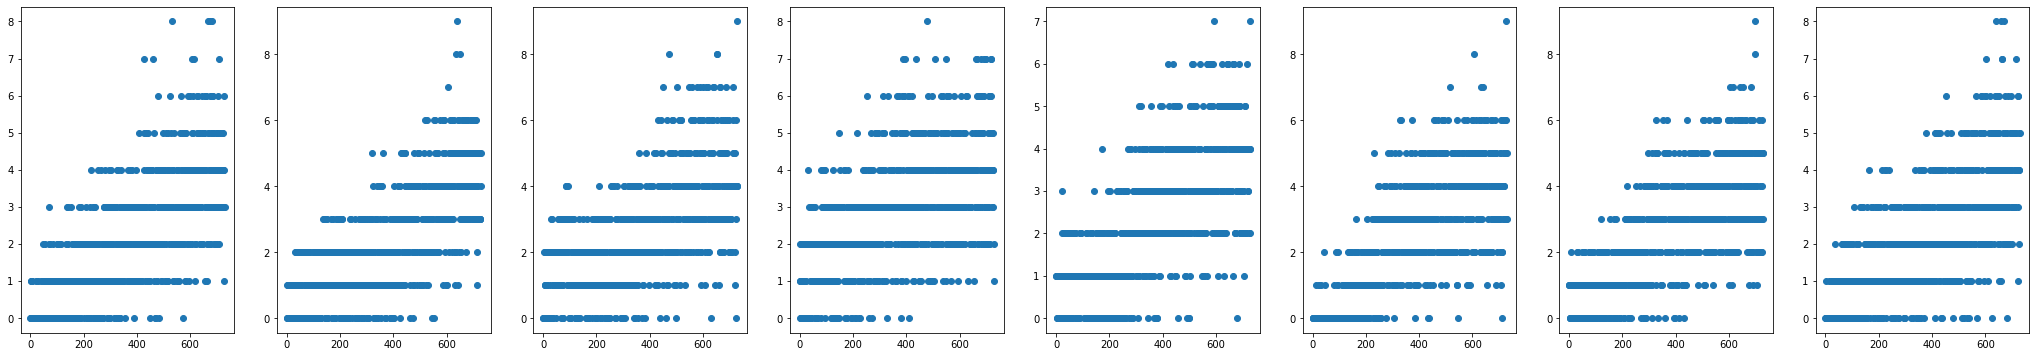

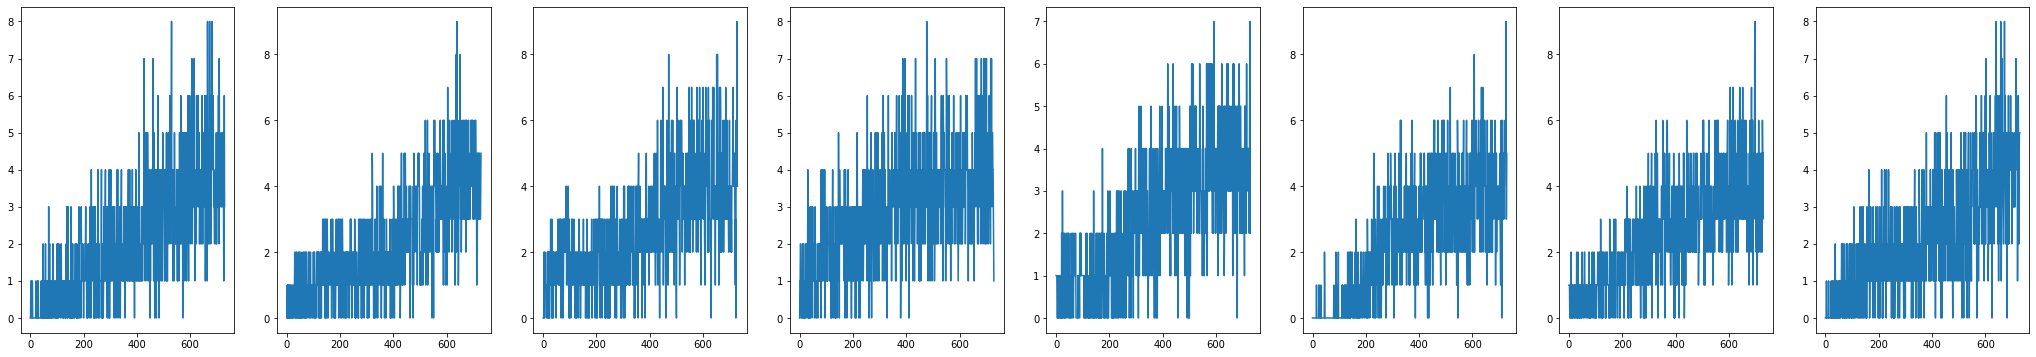

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(36, 6))
#for each pod
for i in range(failure_data.shape[0]):
  ax = fig.add_subplot(1, failure_data.shape[0], i+1)
  ax.scatter(range(failure_data.shape[2]), np.sum(failure_data[i], axis=0))
plt.show()

fig = plt.figure(figsize=(36, 6))
#for each pod
for i in range(failure_data.shape[0]):
  ax = fig.add_subplot(1, failure_data.shape[0], i+1)
  ax.plot(np.sum(failure_data[i], axis=0))
plt.show()

# Generate synthetic data on failures for building models taking into account server replacement




In [5]:
num_pods = 8 
pod_size = 10 
num_days = (early_life_days + useful_life_days + wearout_life_days) 
failure_data = np.zeros((num_pods, pod_size, num_days))

# Generates synthetic data about servers' failures for a given number of PODs
for pod in range(num_pods):
  # Generate randomly life progresses of servers between 0 and num_days
  life_progresses = (np.random.random(pod_size) * num_days).astype(int)
  # Generates failures for each server based on their life progress
  for server in range(pod_size):
      servers_failures = []
      # Verify whether the server fails for a given day based on its life progress
      for day in range(life_progresses[server], life_progresses[server] + num_days):
        server_failure = check_over_for_failure(day % num_days,
                                                bathtub,
                                                max_early_life_failure_rate,
                                                max_useful_life_failure_rate,
                                                max_wearout_life_failure_rate,
                                                early_life_days,
                                                useful_life_days,
                                                wearout_life_days)
        servers_failures.append(server_failure)
      failure_data[pod][server] = np.array(servers_failures)

failure_data

array([[[1., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 1., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

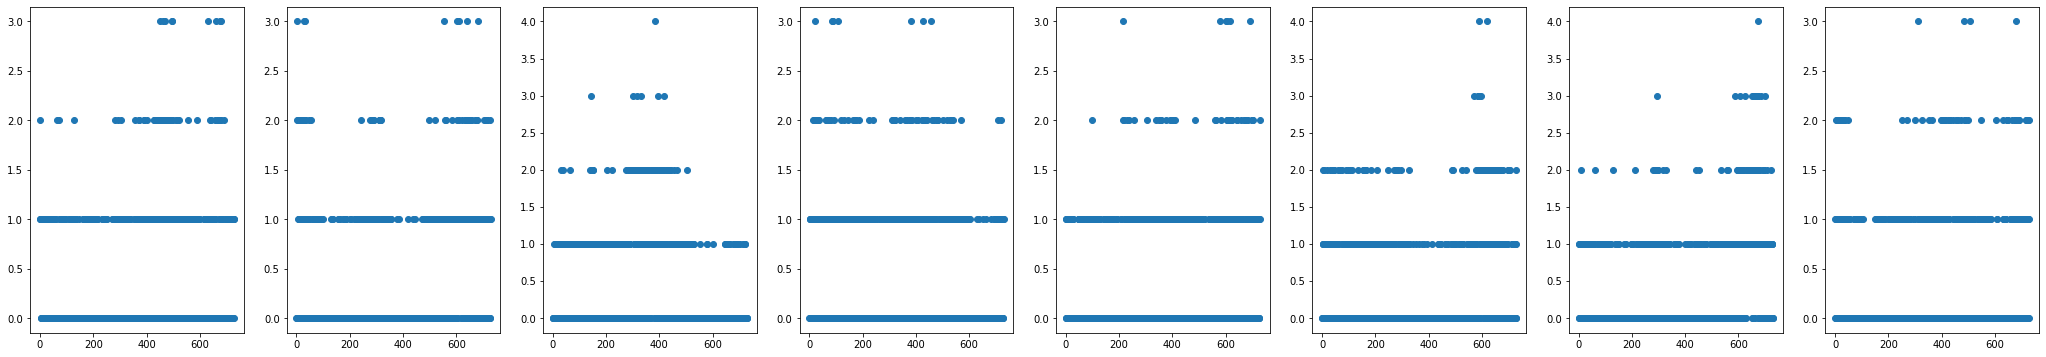

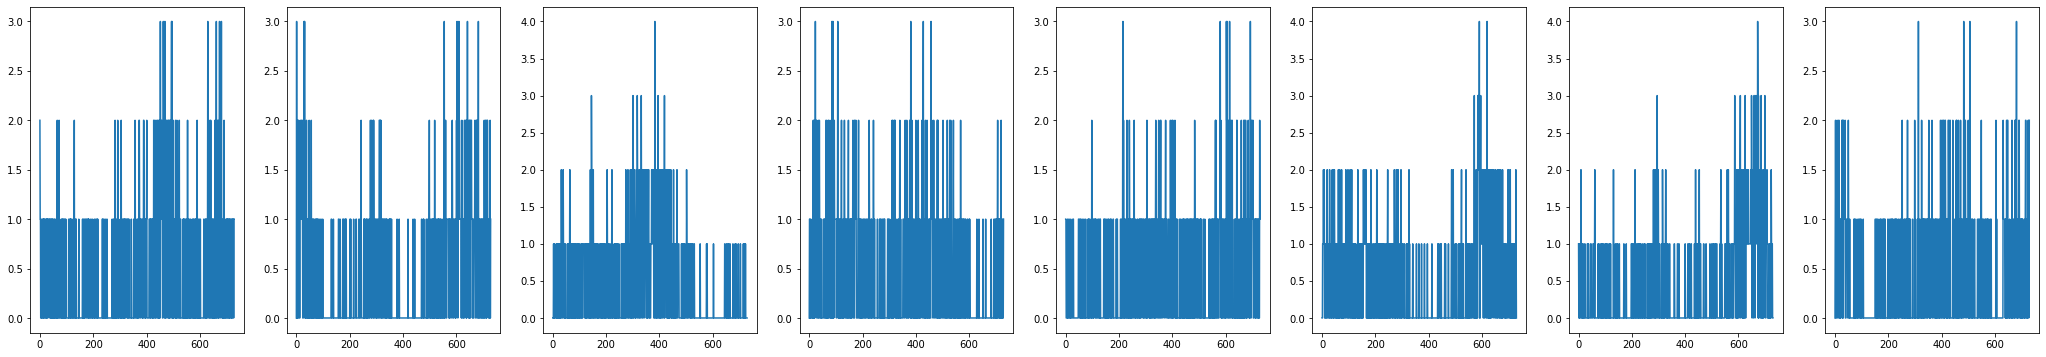

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(36, 6))
#for each pod
for i in range(failure_data.shape[0]):
  ax = fig.add_subplot(1, failure_data.shape[0], i+1)
  ax.scatter(range(failure_data.shape[2]), np.sum(failure_data[i], axis=0))
plt.show()

fig = plt.figure(figsize=(36, 6))
#for each pod
for i in range(failure_data.shape[0]):
  ax = fig.add_subplot(1, failure_data.shape[0], i+1)
  ax.plot(np.sum(failure_data[i], axis=0))
plt.show()

# Simple Exponential Smoothing 

Simple Exponential Smoothing is used for time series prediction when the data particularly does not follow any:

- Trend: An upward or downward slope
- Seasonality: Shows a particular pattern due to seasonal factors like Hours, days, Year, etc.

References 

* Hewamalage, H., Bergmeir, C., & Bandara, K. (2021). Recurrent neural networks for time series forecasting: Current status and future directions. International Journal of Forecasting, 37(1), 388-427.

* Hands-On Guide to Time Series Analysis using Simple Exponential Smoothing in Python. Available at:
https://analyticsindiamag.com/hands-on-guide-to-time-series-analysis-using-simple-exponential-smoothing-in-python/#:~:text=Simple%20Exponential%20Smoothing%20(SES)%20is,statsmodel%20using%20pip%20install%20statsmodel.&text=Simple%20Exponential%20Smoothing%20is%20defined,where%20we%20will%20import%20it.



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


302.58881208162865 728    0.585498
729    0.610128
730    0.633295
731    0.633295
732    0.633295
733    0.633295
dtype: float64 0.6332951843487178


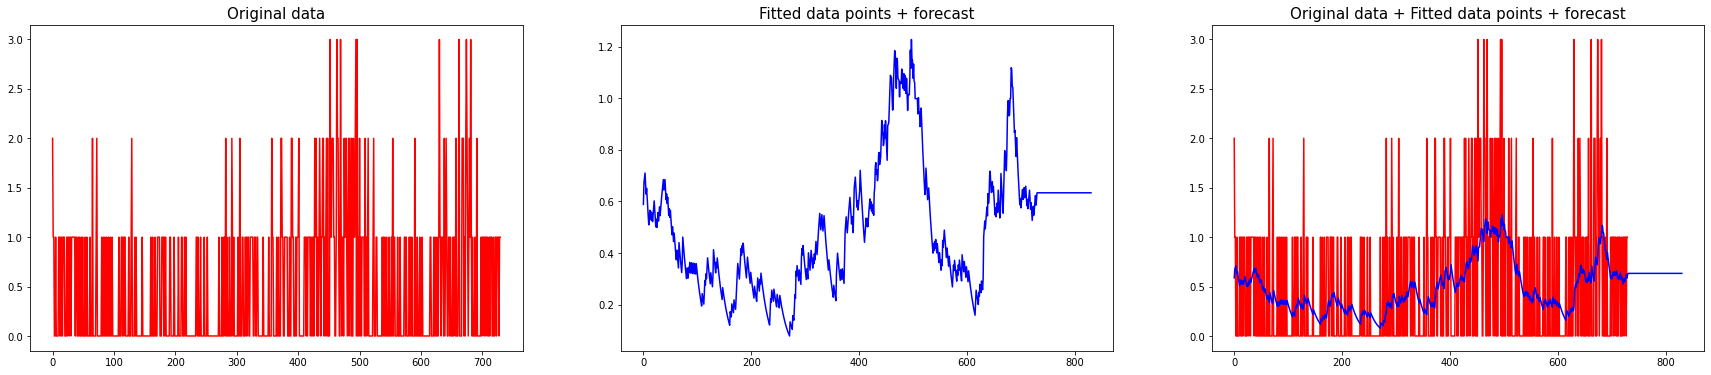

261.906188701918 728    0.818963
729    0.765578
730    0.780859
731    0.780859
732    0.780859
733    0.780859
dtype: float64 0.7808590950862314


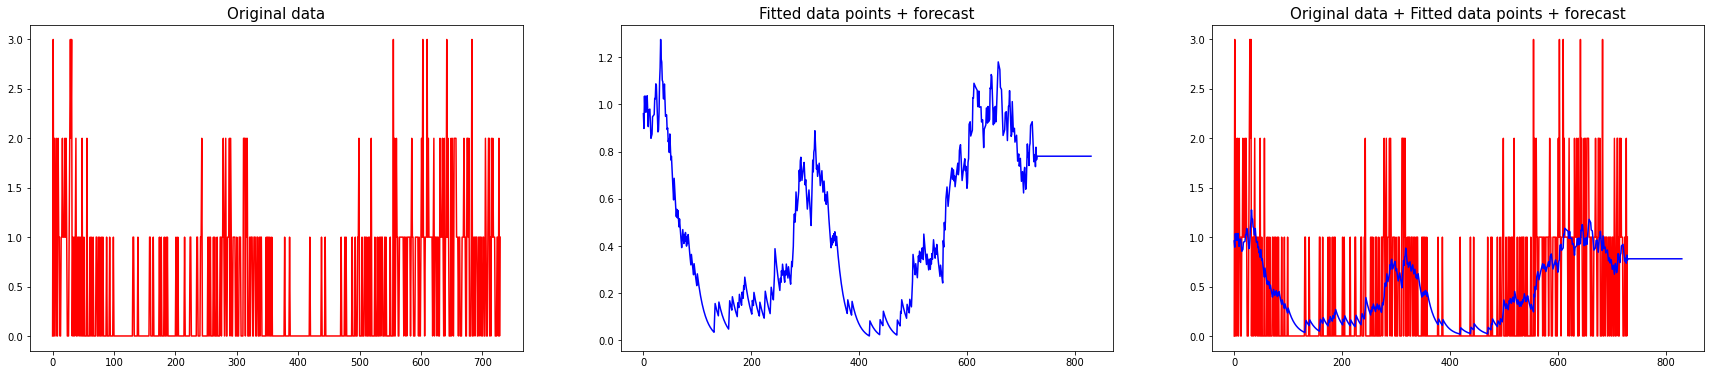

281.6393219159164 728    0.191279
729    0.181083
730    0.171430
731    0.171430
732    0.171430
733    0.171430
dtype: float64 0.1714296309642905


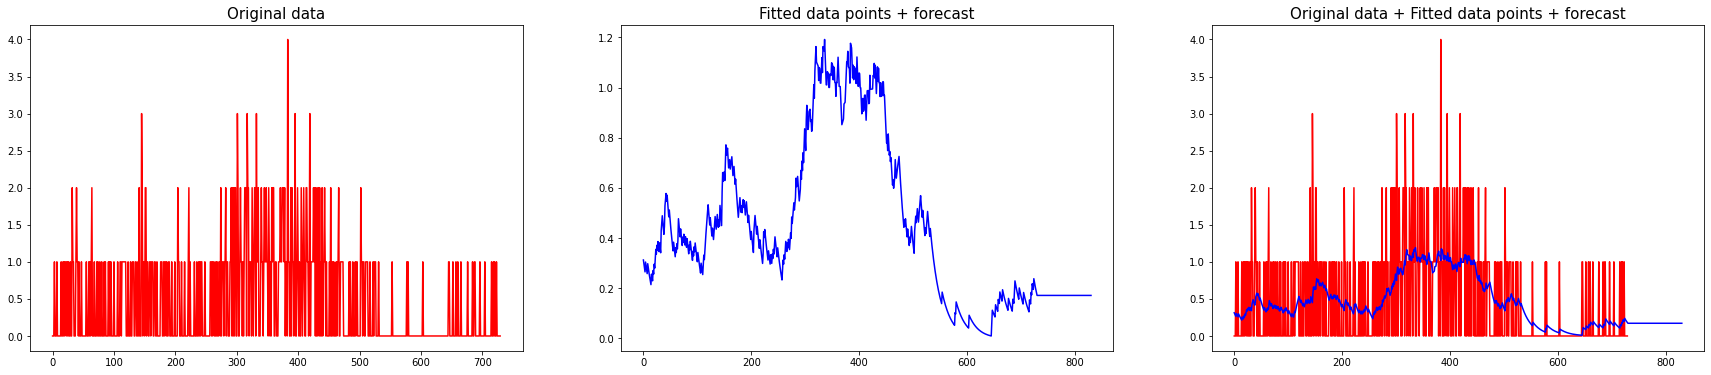

306.85603497211423 728    0.436048
729    0.416820
730    0.442536
731    0.442536
732    0.442536
733    0.442536
dtype: float64 0.4425357681987791


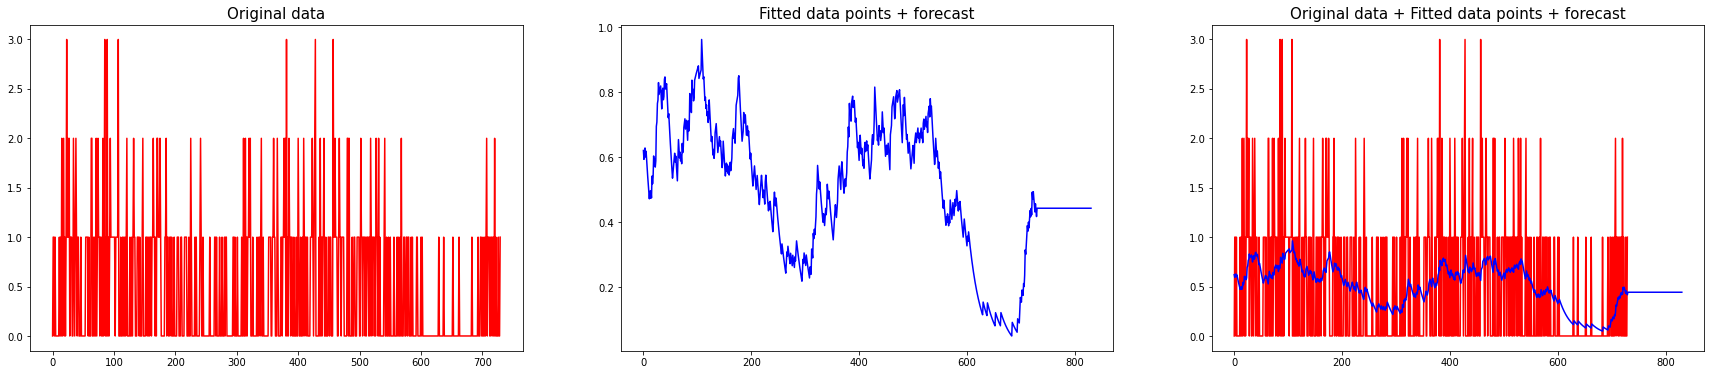

276.6692027801528 728    0.642917
729    0.705875
730    0.719520
731    0.719520
732    0.719520
733    0.719520
dtype: float64 0.7195196325034819


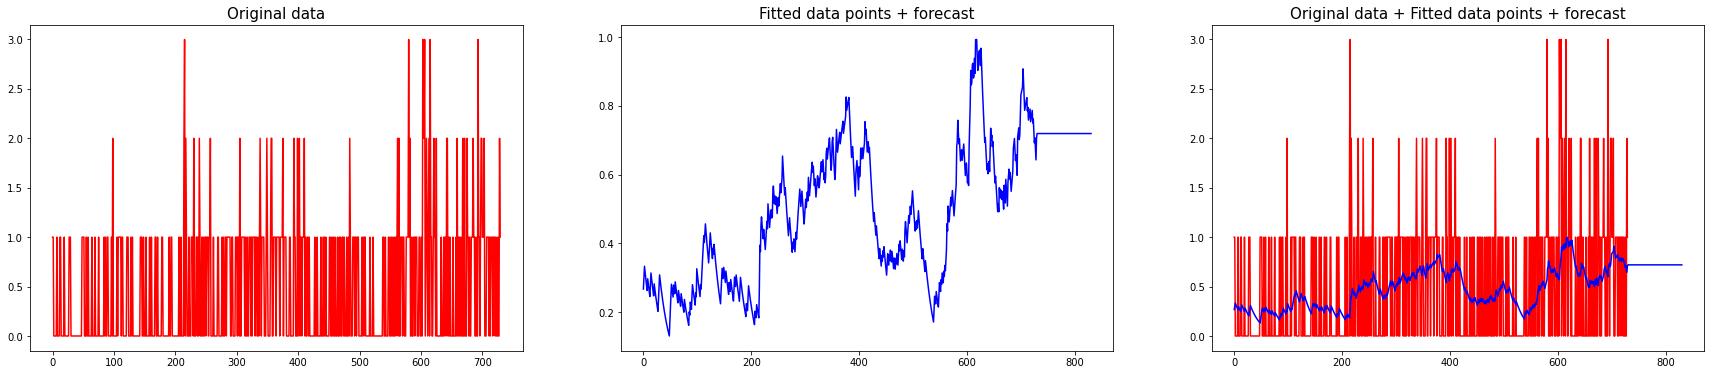

329.37765735923693 728    0.517234
729    0.547196
730    0.513235
731    0.513235
732    0.513235
733    0.513235
dtype: float64 0.5132348110011468


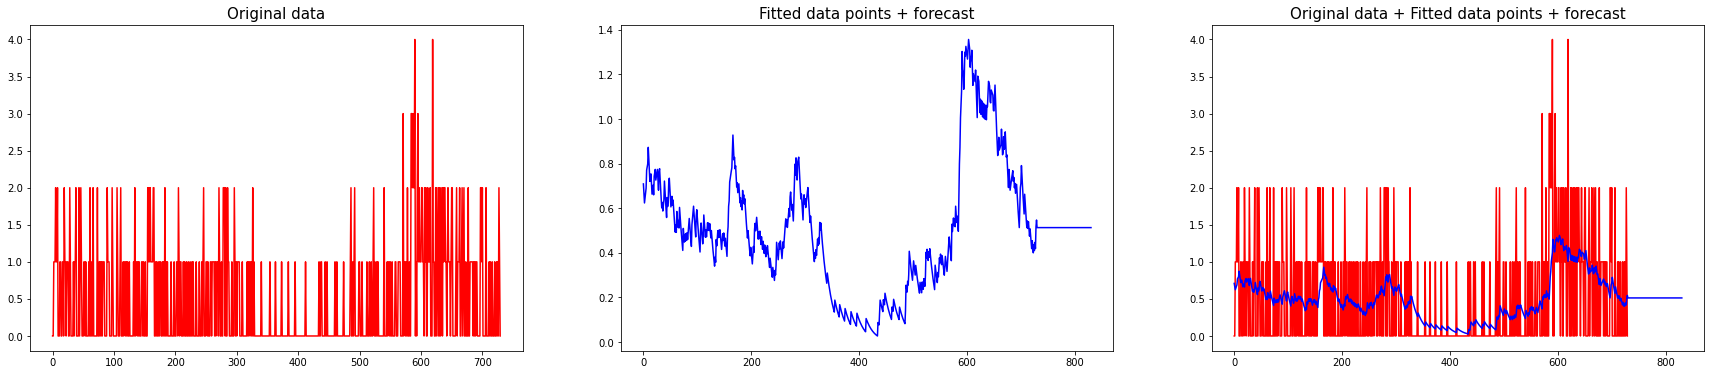

279.967072281135 728    0.769748
729    0.711945
730    0.658483
731    0.658483
732    0.658483
733    0.658483
dtype: float64 0.6584830443228529


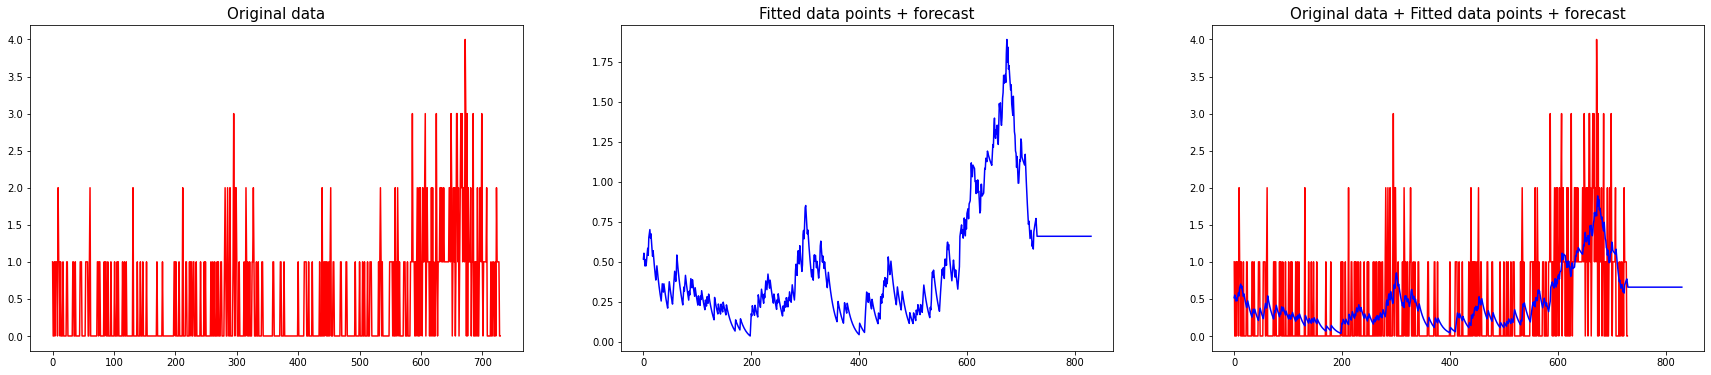

284.5178657223473 728    0.676650
729    0.696912
730    0.778565
731    0.778565
732    0.778565
733    0.778565
dtype: float64 0.7785647161889507


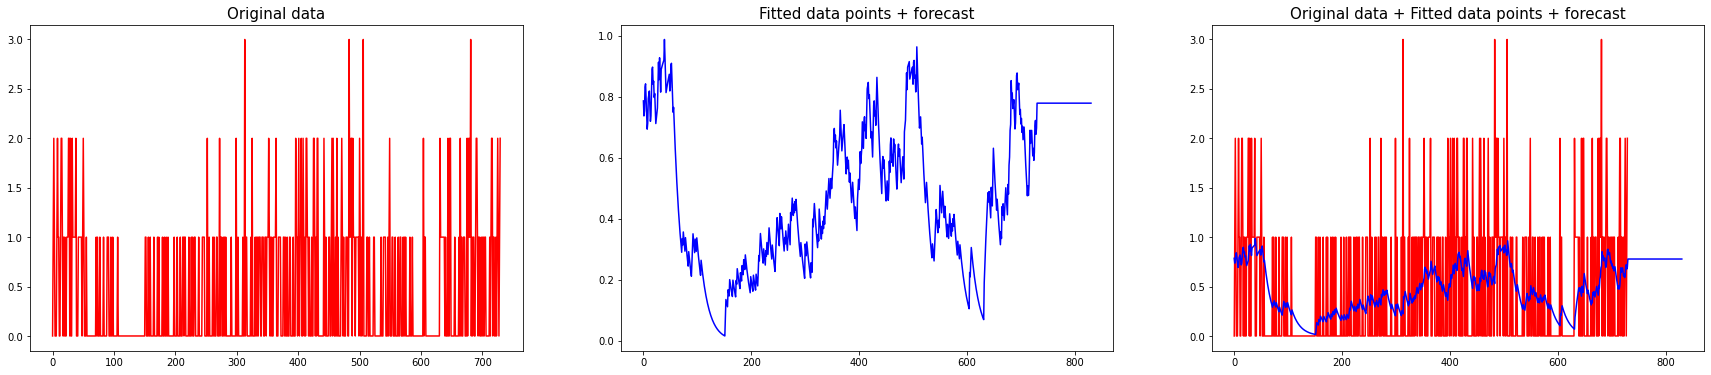

In [7]:
from statsmodels.tsa.api import SimpleExpSmoothing
import pandas as pd

#for each pod
for i in range(failure_data.shape[0]):
  fig = plt.figure(figsize=(30, 6))

  steps_to_forecast = 100

  data = pd.Series(np.sum(failure_data[i], axis=0), name="Original data")

  optimized_model = SimpleExpSmoothing(data).fit()
  optimized_forecast = optimized_model.forecast(steps_to_forecast)
  print(optimized_model.sse, optimized_model.predict(728, 733), optimized_forecast.array.reshape(1, -1)[0][0])

  ax = fig.add_subplot(1, 3, 1)
  ax.set_title("Original data", fontsize=15)
  ax.plot(data, color="red") 

  ax = fig.add_subplot(1, 3, 2)
  ax.set_title("Fitted data points + forecast", fontsize=15)
  no_weight_history = np.hstack((optimized_model.fittedfcast.reshape(1, -1),
                                optimized_forecast.array.reshape(1, -1)))
  ax.plot(no_weight_history.reshape(-1,), color='blue') 

  ax = fig.add_subplot(1, 3, 3)
  ax.set_title("Original data + Fitted data points + forecast" , fontsize=15)
  ax.plot(data, color="red") 
  ax.plot(no_weight_history.reshape(-1,), color="blue") 

  plt.show()

# Exponential smoothing - Holt’s Method

Reference
 
https://www.statsmodels.org/dev/examples/notebooks/generated/exponential_smoothing.html#Holt%E2%80%99s-Method


302.5879847030474 728    0.586599
729    0.611223
730    0.634384
731    0.634449
732    0.634513
733    0.634578
dtype: float64 0.6343837182569759


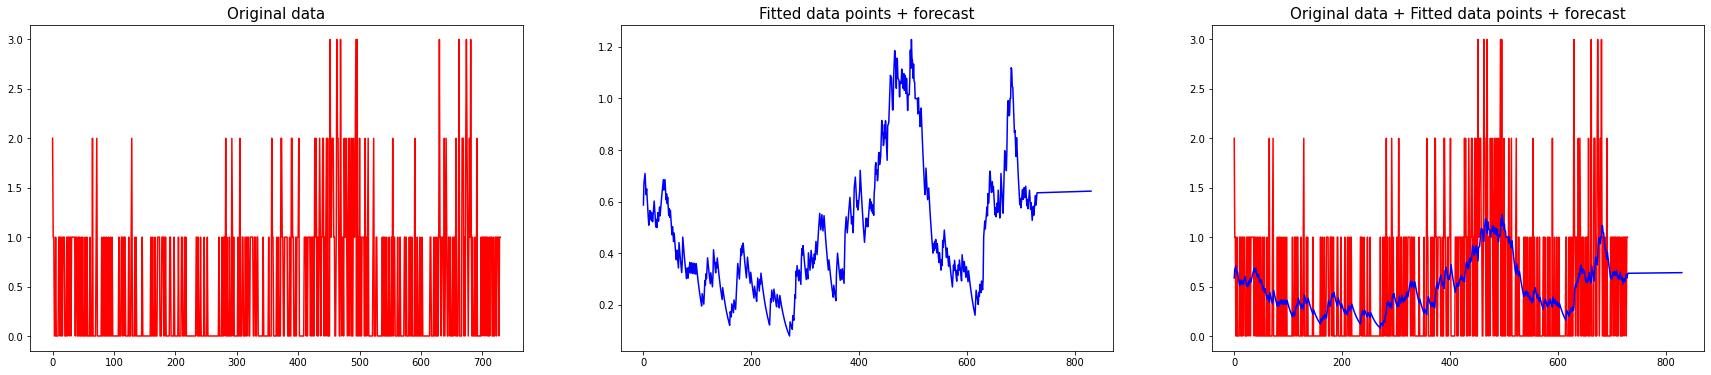

261.90618870188445 728    0.818963
729    0.765578
730    0.780859
731    0.780859
732    0.780859
733    0.780859
dtype: float64 0.7808590933824029


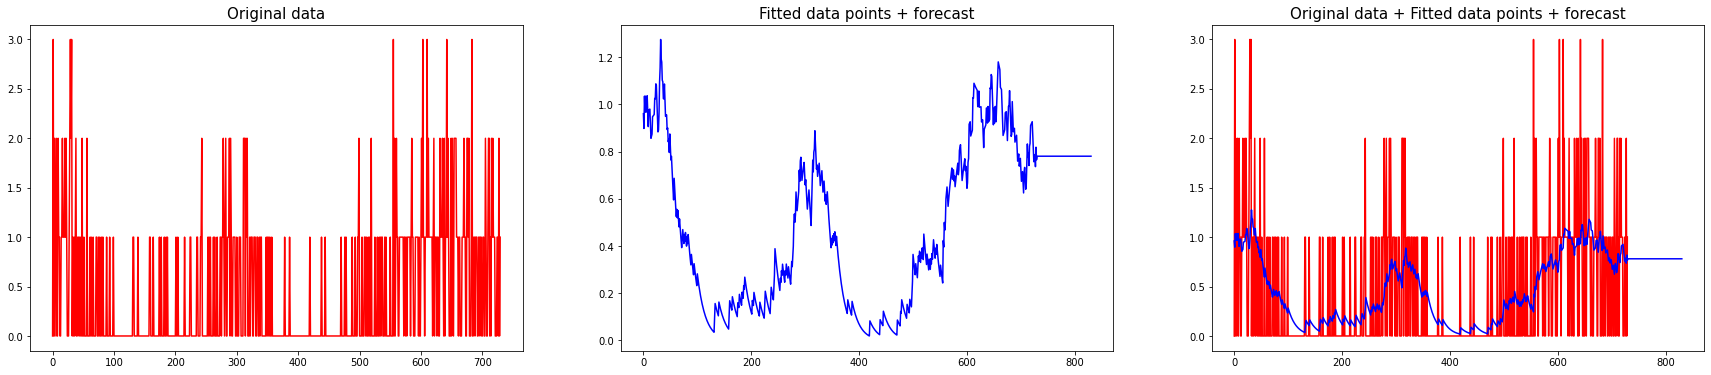

281.6393219159159 728    0.191279
729    0.181083
730    0.171430
731    0.171430
732    0.171430
733    0.171430
dtype: float64 0.17142963068991673


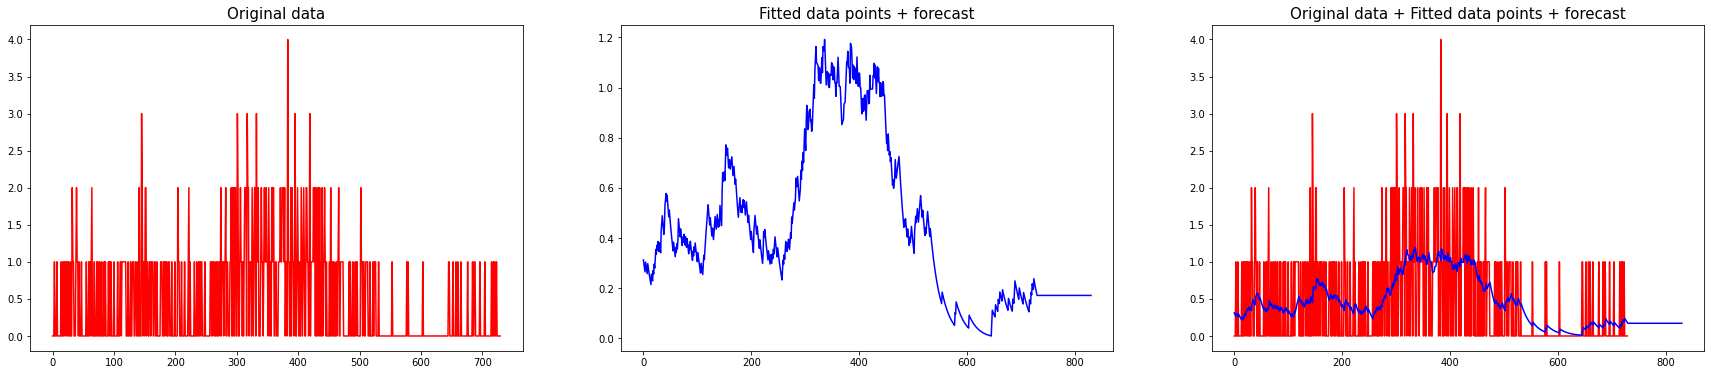

306.8560349720963 728    0.436048
729    0.416820
730    0.442536
731    0.442536
732    0.442536
733    0.442536
dtype: float64 0.4425358368598349


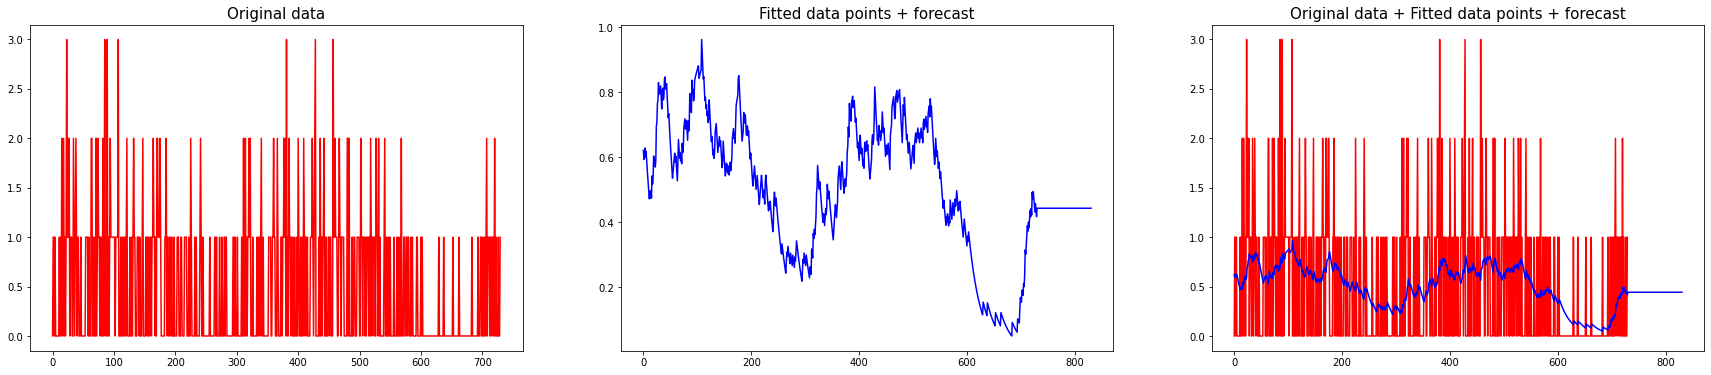

276.52356862438677 728    0.662302
729    0.722066
730    0.735008
731    0.735670
732    0.736333
733    0.736996
dtype: float64 0.735007836398684


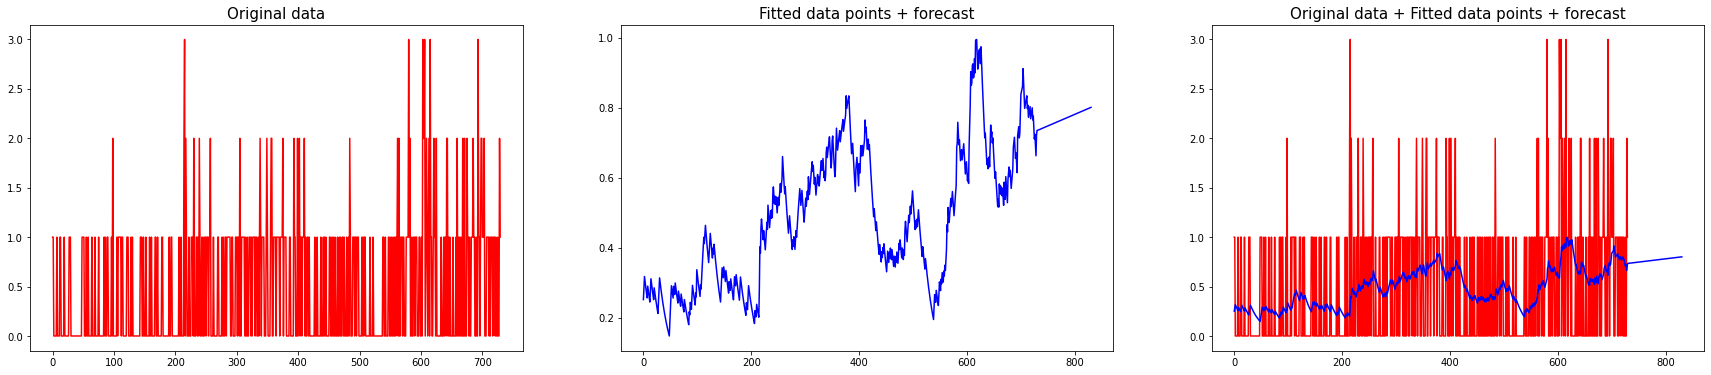

329.3776573590107 728    0.517234
729    0.547196
730    0.513235
731    0.513235
732    0.513235
733    0.513235
dtype: float64 0.5132348877422479


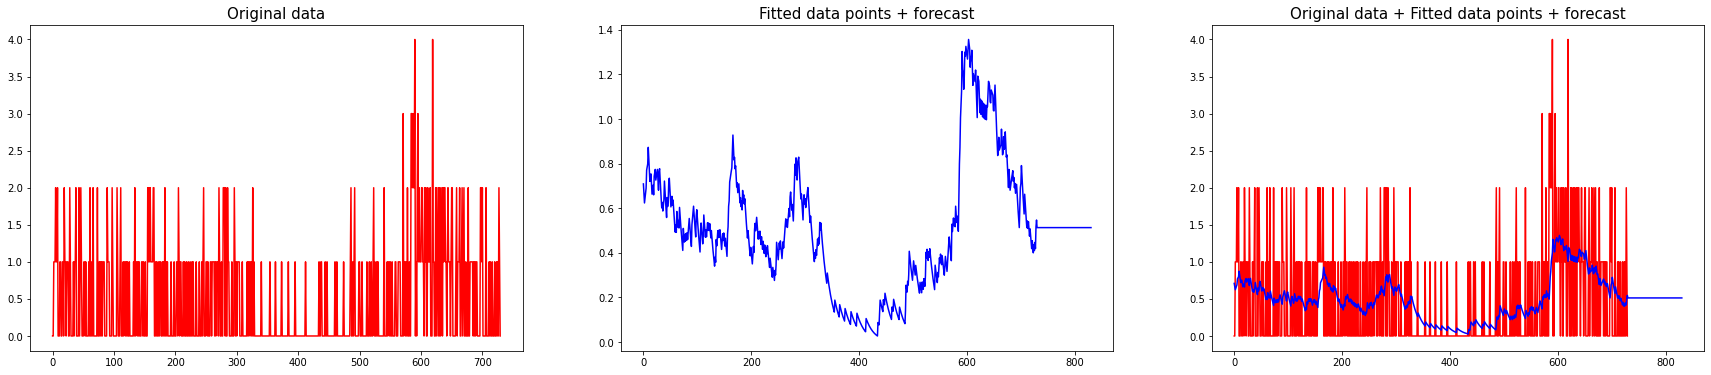

279.9619592284767 728    0.772532
729    0.714806
730    0.661408
731    0.661610
732    0.661813
733    0.662015
dtype: float64 0.6614080953212139


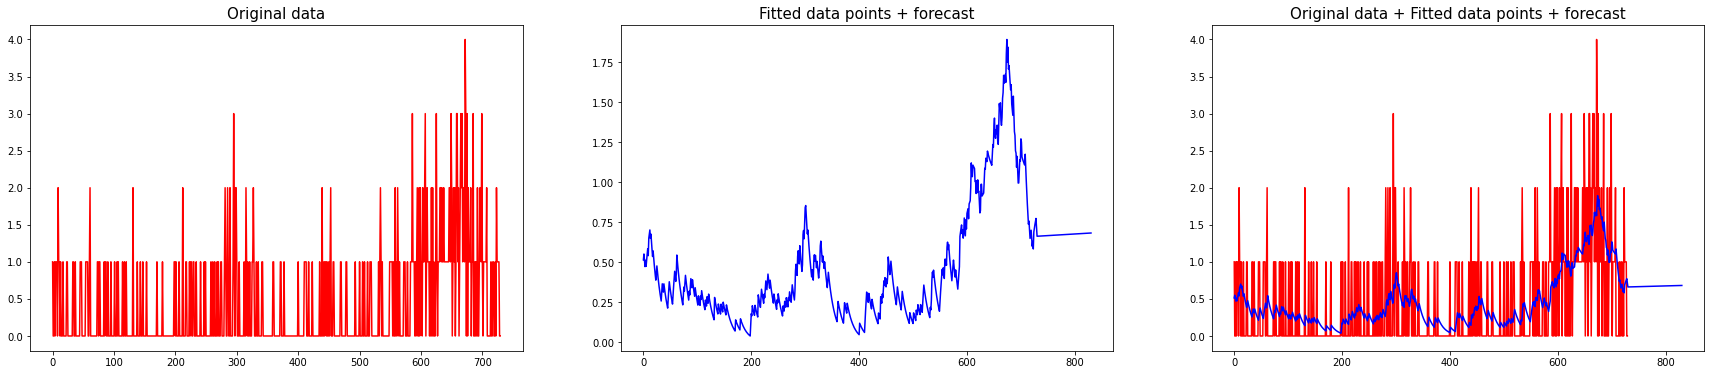

284.51786572234784 728    0.676650
729    0.696912
730    0.778565
731    0.778565
732    0.778565
733    0.778565
dtype: float64 0.7785647042171178


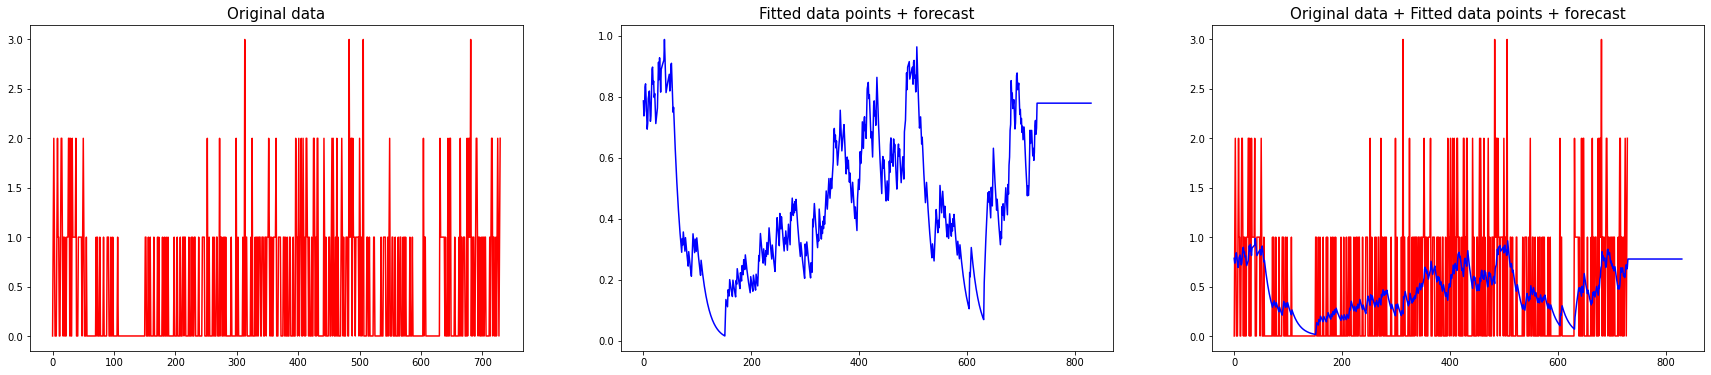

In [8]:
from statsmodels.tsa.api import Holt
import pandas as pd

#for each pod
for i in range(failure_data.shape[0]):

  fig = plt.figure(figsize=(30, 6))

  steps_to_forecast = 100

  data = pd.Series(np.sum(failure_data[i], axis=0), name="Original data")

  #optimized_model = Holt(data, damped_trend=True, initialization_method="estimated").fit(smoothing_level=0.8, smoothing_trend=0.2)
  optimized_model = Holt(data).fit(optimized=True)
  optimized_forecast = optimized_model.forecast(steps_to_forecast)
  print(optimized_model.sse, optimized_model.predict(728, 733), optimized_forecast.array.reshape(1, -1)[0][0])


  ax = fig.add_subplot(1, 3, 1)
  ax.set_title("Original data", fontsize=15)
  ax.plot(data, color="red") 

  ax = fig.add_subplot(1, 3, 2)
  ax.set_title("Fitted data points + forecast", fontsize=15)
  no_weight_history = np.hstack((optimized_model.fittedfcast.reshape(1, -1),
                                optimized_forecast.array.reshape(1, -1)))
  ax.plot(no_weight_history.reshape(-1,), color='blue') 

  ax = fig.add_subplot(1, 3, 3)
  ax.set_title("Original data + Fitted data points + forecast" , fontsize=15)
  ax.plot(data, color="red") 
  ax.plot(no_weight_history.reshape(-1,), color="blue") 

  plt.show()